## import basic packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")

# Understanding the dataset

## read the dataset

In [4]:
filename = '../datasets/letter-recognition.csv'
df = pd.read_csv(filename)

## Features

1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)

In [5]:
print("number of missing values per feature",df.isnull().sum())

number of missing values per feature letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [6]:
#Check if there is a duplicate row 
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  1332


In [7]:
#remove duplicates 
df=df.drop_duplicates(keep="first")

In [8]:
print("length of the dataset : ", df.shape[0])
print("number of features : ", df.shape[1])

length of the dataset :  18668
number of features :  17


In [19]:
df.head()

letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10

In [28]:
#replace letters to numbers from 0 to 25
df2numbers = df.copy()
#you can alse use pd.replace 
letters = list(np.sort(df['letter'].unique()))
numbers = list(np.arange(0,26))
for letter, number in zip(letters, numbers):
    df2numbers.replace(letter,number,inplace=True)
df2numbers.head()

letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      19      2      8       3       5       1      8     13      0       6   
1       8      5     12       3       7       2     10      5      5       4   
2       3      4     11       6       8       6     10      6      2       6   
3      13      7     11       6       6       3      5      9      4       6   
4       6      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10

In [29]:
target_col = ["letter"]
print("The target variable is :  ", target_col)

The target variable is :   ['letter']


In [13]:
# sns.pairplot(df,hue='letter')
# plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fde0b356430> (for post_execute):



KeyboardInterrupt



In [30]:
df_corr = df2numbers.corr().transpose()

In [1]:

fig = plt.figure(figsize=(6,4))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,fmt=".1f",annot=False,cmap='YlGnBu')
plt.show()

NameError: name 'plt' is not defined

In [40]:
df_corr_output = df_corr.iloc[:,-1]
print("correlations between features and hear attach: ",df_corr_output)

correlations between features and hear attach:  letter   -0.184479
xbox     -0.097928
ybox     -0.031288
width    -0.111611
height   -0.006940
onpix    -0.053799
xbar      0.258355
ybar     -0.211369
x2bar     0.185946
y2bar    -0.061613
xybar    -0.108670
x2ybar   -0.242875
xy2bar    0.243253
xedge    -0.045856
xedgey   -0.185969
yedge     0.150748
yedgex    1.000000
Name: yedgex, dtype: float64


In [41]:
df_corr[['letter']].transpose()

letter     xbox      ybox     width     height    onpix      xbar   \
letter     1.0  0.105646 -0.000023  0.093698  0.041871  0.000835 -0.055585   

           ybar     x2bar    y2bar     xybar     x2ybar    xy2bar    xedge   \
letter  0.311597 -0.11398  0.000437 -0.081157  0.387574 -0.141832  0.096098   

          xedgey    yedge     yedgex  
letter  0.336402 -0.068714 -0.184479

<AxesSubplot:>

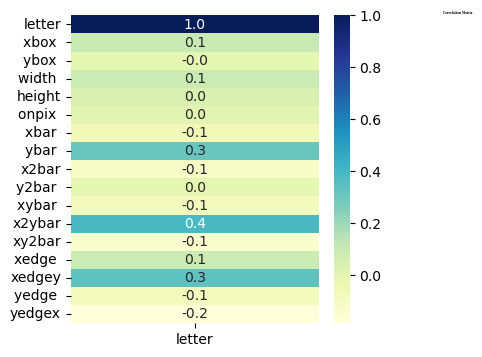

In [42]:
fig = plt.figure(figsize=(4,4))
# gs = fig.add_gridspec(1,1)
# gs.update(wspace=0.3, hspace=0.1)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=2, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr[['letter']],fmt=".1f",annot=True,cmap='YlGnBu')

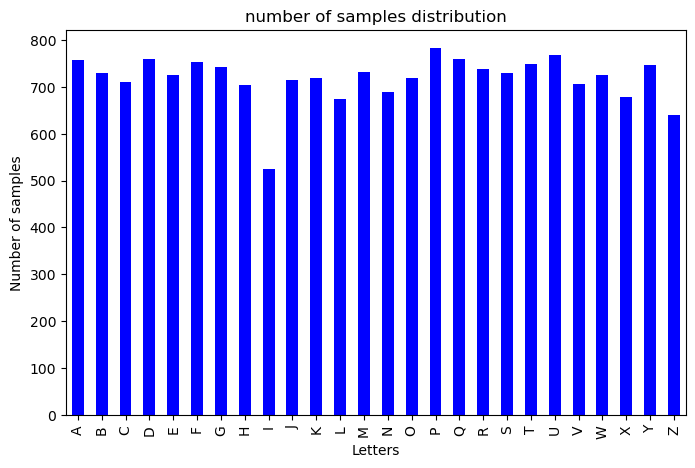

In [64]:
fig, ax = plt.subplots(figsize=(8,5))
df.iloc[:,0].value_counts().sort_index().plot(ax=ax, kind='bar', title = "number of samples distribution",color='blue')
plt.xlabel("Letters")
plt.ylabel("Number of samples")
# plt.savefig(outputFolder+ "Class Distribution - LC.png")
plt.show()
# plt.close()

# preprocessing: preparing the data

In [44]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [46]:
# creating a copy of df
df1_copy = df

# seperate features with target
X = df1_copy.drop(['letter'],axis=1)
y = df1_copy[['letter']]

# instantiating the scaler
scaler = RobustScaler()
# scaler = StandardScaler()

# scaling the continuous featuree
X = scaler.fit_transform(X)


In [48]:
#separate data for testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 102)
y_train = y_train.squeeze(1)
y_test = y_test.squeeze(1)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (14934, 16)
The shape of X_test is        (3734, 16)
The shape of y_train is       (14934,)
The shape of y_test is        (3734,)


In [ ]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'max_iter': [1000,2000],
            'hidden_layer_sizes': [(10,),(30,),(100,),(200,),(5,5),(5,10),(10,20),(20,30),(30,40),(40,50),(100,100),(200,200),(100,100,100)],
            'alpha': 10.0 ** -np.arange(1, 5),
            'random_state':[102,7,88,91]
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=6, verbose = 3,
                           scoring='accuracy',n_jobs=-1)
# clf = MLPClassifier(solver='adam', learning_rate_init=1e-3,hidden_layer_sizes=(50, ), random_state=102)
clf.fit(X_train,y_train.squeeze(1))

print("Best parameters set found on development set:")
print(clf.best_params_)


Fitting 6 folds for each of 4992 candidates, totalling 29952 fits
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.750 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.707 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.650 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=

[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.659 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.650 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.750 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=

[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.625 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.650 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.900 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=sgd;, score=0.675 total time=   0.4s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver

[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.675 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.850 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.575 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=sgd;, score=0.732 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=sg

[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=sgd;, score=0.707 total time=   0.4s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, 

[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.732 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=sgd;, score=0.707 total time=   0.4s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.3s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, 

[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=88, solver=sgd;, score=0.650 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, solver=sgd;, score=0.675 total time=   0.3s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, 

[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=adam;, score=0.625 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=sgd;, score=0.725 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.4s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solve

[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=sgd;, score=0.775 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=adam;, score=0.732 total time=   0.3s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=adam;, score=0.675 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.675 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=adam;, score=0.732 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_sta

[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=adam;, score=0.700 total time=   1.7s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=sgd;, score=0.775 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=adam;, score=0.732 total time=   0.6s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=adam;, score=0.675 total time=   0.8s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=

[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=sgd;, score=0.675 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=adam;, score=0.750 total time=   0.4s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=adam;, score=0.575 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=sgd;, score=0.650 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=adam;, score=0.707 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=adam;, score=0.750 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_sta

[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=adam;, score=0.575 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.732 total time=   0.4s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=adam;, score=0.700 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=adam;, score=0.625 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=sgd;, score=0.750 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=adam;, score=0.732 total time=   0.3s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_s

[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=adam;, score=0.650 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.650 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=adam;, score=0.700 total time=   0.3s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random

[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.732 total time=   0.1s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.725 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_

[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.1s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, score=0.732 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, score=0.625 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_s

[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=91, solver=sgd;, score=0.725 total time=   1.6s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=91, solver=adam;, score=0.780 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=91, solver=adam;, score=0.675 total time=   1.1s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.4s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=sgd;, score=0.707 total time=   0.6s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=adam;, score=0.732 total time=   0.9s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(

[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=sgd;, score=0.732 total time=   1.5s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.756 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.6s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.850 total time=   0.6s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.5s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=sgd;, score=0.650 total time=   1.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=20

[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.6s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=sgd;, score=0.732 total time=   1.6s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.5s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.4s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.5s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.7s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(200, 200), max_

[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.700 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.4s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.625 total time=   1.1s
[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.750 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.725 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.1, hi

[CV 6/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.775 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.732 total time=   1.0s
[CV 5/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=lbfgs;, score=0.675 total time=   0.4s
[CV 3/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.6s
[CV 2/6] END activation=identity, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=adam;, score=0.725 total time=   0.4s
[CV 5/6] END activation=identity, alpha=0.1, hidden_lay

[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.3s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=88, solver=sgd;, score=0.650 total time=   0.3s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=88, solver=adam;, score=0.675 total time=   0.3s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=88, solver=adam;, score=0.650 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, so

[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.707 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91

[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=sgd;, score=0.650 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_sta

[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.707 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_st

[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=7, solver=adam;, score=0.675 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=7, solver=adam;, score=0.675 total time=   0.4s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=sgd;, score=0.700 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=sgd;, score=0.775 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=9

[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=adam;, score=0.800 total time=   0.4s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.675 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.875 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=102, solver=adam;, score=0.732 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=102, solver=adam;, score=0.625 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random

[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=102, solver=adam;, score=0.625 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=102, solver=adam;, score=0.725 total time=   0.3s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=adam;, score=0.725 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.707 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.650 total time=   0.6s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, rando

[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=102, solver=sgd;, score=0.750 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.756 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_

[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=sgd;, score=0.650 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=sgd;, score=0.750 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=20

[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=sgd;, score=0.725 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=adam;, score=0.700 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=1000

[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=sgd;, score=0.625 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.775 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000,

[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=adam;, score=0.600 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.625 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, 

[CV 3/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=sgd;, score=0.650 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, score=0.750 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=sgd;, score=0.650 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=sgd;, score=0.750 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random

[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=sgd;, score=0.732 total time=   0.6s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=sgd;, score=0.675 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=102, solver=sgd;, score=0.707 total time=   1.4s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=102, solver=sgd;, score=0.750 total time=   0.9s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=sgd;, score=0.732 total time=   1.5s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=sgd;, score=0.725 total time=   0.8s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_i

[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=sgd;, score=0.750 total time=   0.7s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.7s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=lbfgs;, score=0.675 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=sgd;, score=0.725 total time=   0.9s
[CV 1/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.756 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(200, 200), ma

[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.675 total time=   0.5s
[CV 5/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.700 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.625 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.750 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.

[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random

[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=adam;, score=0.675 total time=   0.3s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=sgd;, score=0.750 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state

[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=adam;, score=0.650 total time=   0.3s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.650 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.775 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000, rand

[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=adam;, score=0.750 total time=   0.3s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.700 total time=   0.4s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.4s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, rando

[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=sgd;, score=0.707 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=sgd;, score=0.700 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=adam;, score=0.732 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30),

[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=sgd;, score=0.550 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=sgd;, score=0.750 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, rand

[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.625 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.900 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=adam;, score=0.707 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=adam;, score=0.725 total time=   0.3s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.675 total time=   0.4s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_s

[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=sgd;, score=0.650 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=sgd;, score=0.675 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, score=0.707 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, score=0.650 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_it

[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=sgd;, score=0.650 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=adam;, score=0.707 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=adam;, score=0.650 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_it

[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=adam;, score=0.575 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), 

[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=sgd;, score=0.625 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=adam;, score=0.650 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=sgd;, score=0.675 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=sgd;, score=0.775 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=20

[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.750 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.700 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.001, hidden_layer_si

[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.700 total time=   0.5s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.750 total time=   0.3s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=sgd;, score=0.625 total time=   0.5s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=sgd;, score=0.800 total time=   0.4s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 

[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.650 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.4s
[CV 3/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=sgd;, score=0.675 total time=   0.4s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=sgd;, score=0.775 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.

[CV 4/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.4s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.750 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.825 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=sgd;, score=0.625 total time=   0.4s
[CV 6/6] END activation=identity, alpha=0.001, hidden_layer_sizes=(100, 

[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.707 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.600 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, ran

[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=88, solver=adam;, score=0.732 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=88, solver=adam;, score=0.725 total time=   0.3s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=sgd;, score=0.750 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=adam;, score=0.750 total time=   0.4s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=sgd;, score=0.650 total time=   0.2s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random

[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=sgd;, score=0.707 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=sgd;, score=0.750 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.650 total time=   0.5s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, rand

[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.700 total time=   0.5s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.625 total time=   0.3s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=adam;, score=0.550 total time=   0.3s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=adam;, score=0.675 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, ran

[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, solver=sgd;, score=0.650 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_

[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.707 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000

[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=adam;, score=0.725 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=adam;, score=0.732 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=adam;, score=0.750 total time=   0.1s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, ra

[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.0s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=sgd;, score=0.675 total time=   0.5s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 5), max_it

[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=adam;, score=0.750 total time=   0.4s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.700 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.675 total time=   0.1s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=adam;, score=0.700 total time=   0.3s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 

[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.756 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.800 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=adam;, score=0.707 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=adam;, score=0.775 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=sgd;, score=0.600 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000

[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=sgd;, score=0.732 total time=   0.4s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=sgd;, score=0.700 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=adam;, score=0.700 total time=   0.3s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10, 20)

[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   0.3s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.625 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=adam;, score=0.675 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=adam;, score=0.800 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=adam;, score=0.650 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(20, 30), max_i

[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.675 total time=   0.2s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.732 total time=   0.3s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.4s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=adam;, score=0.650 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(30, 40), max_

[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=sgd;, score=0.700 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=91, solver=sgd;, score=0.675 total time=   0.2s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=91, solver=sgd;, score=0.625 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=91, solver=adam;, score=0.600 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=91, solver=adam;, score=0.700 total time=   0.1s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.0s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(40, 50), 

[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.725 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.707 total time=   0.5s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.725 total time=   0.4s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.732 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_size

[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=sgd;, score=0.725 total time=   0.5s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=adam;, score=0.700 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.2s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.2s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=sgd;, score=0.575 total time=   0.8s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.6s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_size

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=sgd;, score=0.775 total time=   0.4s
[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=sgd;, score=0.775 total time=   0.3s
[CV 5/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=adam;, score=0.675 total time=   0.1s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.707 total time=   0.5s
[CV 3/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.675 total time=   0.2s
[CV 6/6] END activation=identity, al

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=adam;, score=0.750 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.775 total time=   0.3s
[CV 1/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.732 total time=   0.2s
[CV 2/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.775 total time=   0.1s
[CV 4/6] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.1s
[CV 2/6] END activation=identity, alph

[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.675 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.3s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.700 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=adam;, score=0.732 total time=   0.6s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.625 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=88, solver=sgd;, score=0.600 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=88, solver=ad

[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=adam;, score=0.700 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=adam;, score=0.450 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   0.7s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.725 total time=   2.2s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=7, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=7, solver=sgd;, score=0.450 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=7, solve

[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=sgd;, score=0.600 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.575 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.550 total time=   0.4s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.700 total time=   0.7s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.600 total time=   0.3s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.550 total time=   1.2s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.550 total time=   0.7s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.775 total time=   1.2s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.525 total time=   0.7s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   1.8s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.700 total time=   1.0s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=adam;, score=0.707 total time=   0.6s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   1.2s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   2.5s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.575 total time=   2.3s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.700 total time=   3.1s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.575 total time=   2.5s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=8

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.756 total time=   0.3s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.700 total time=   0.4s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=adam;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=adam;, score=0.450 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solv

[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=adam;, score=0.475 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.3s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=lbfgs;, score=0.800 total time=   0.5s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=lbfgs;, score=0.700 total time=   0.2s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=sgd;, score=0.525 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=sgd;, score=0.525 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.537 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.550 total time=   0.0s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.550 total time=   0.0s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=adam;, score=0.475 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=lbfgs;, score=0.550 total time=   0.4s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=lbfgs;, score=0.550 total time=   0.8s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=91, solver=lbfgs;, score=0.600 total time=   0.7s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.9s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=102, solver=sgd;, score=0.537 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=2000, ra

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.450 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.475 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.475 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=adam;, score=0.707 total time=   0.4s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=adam;, score=0.450 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=lbfgs;, score=0.756 total time=   1.6s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=sgd;, score=0.525 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=adam;, score=0.450 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.2s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=lbfgs;, score=0.732 total time=   1.7s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.537 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, rand

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=91, solver=sgd;, score=0.525 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=91, solver=adam;, score=0.525 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=91, solver=adam;, score=0.525 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=lbfgs;, score=0.707 total time=   4.8s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=lbfgs;, score=0.550 total time=   1.8s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=lbfgs;, score=0.625 total time=   3.7s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=lbfgs;, score=0.575 total time=   1.9s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=lbfgs;, score=0.550 total time=   2.8s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   5.4s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=1

[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.525 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.707 total time=   0.5s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_sta

[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=102, solver=adam;, score=0.550 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=102, solver=adam;, score=0.525 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=102, solver=adam;, score=0.525 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=lbfgs;, score=0.550 total time=  20.8s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=lbfgs;, score=0.700 total time=  20.8s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=lbfgs;, score=0.625 total time=  21.3s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200), ma

[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=88, solver=adam;, score=0.475 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.756 total time=   6.9s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.650 total time=   6.6s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.575 total time=   5.6s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.750 total time=   7.4s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.725 total time=   6.7s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), 

[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   0.3s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.625 total time=   0.7s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.575 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.707 total time=   0.6s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.775 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.550 total time=   0.2s
[CV 4/6] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.550 total time=   0.4s
[CV 5/6] END activation=logistic, alpha=0.1, hidd

[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   0.5s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.659 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.575 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.575 total time=   0.0s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.750 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.650 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=adam;, score=0.732 total time=   0.6s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.4s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.575 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=88, solver=sgd;, score=0.600 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=88, solver=adam;, score=0.725 total time=   0.6s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=88, sol

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   0.4s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.400 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=adam;, score=0.707 total time=   0.5s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, 

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.625 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.575 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.625 total time=   0.4s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.450 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.550 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.707 total time=   2.2s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_s

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.450 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.600 total time=   0.3s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.725 total time=   0.4s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.625 total time=   1.4s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=adam;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_st

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.650 total time=   2.2s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.600 total time=   2.6s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.550 total time=   1.7s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.600 total time=   2.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.525 total time=   1.3s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_s

[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=sgd;, score=0.525 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=sgd;, score=0.525 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=adam;, score=0.550 total time=   0.0s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=adam;, score=0.550 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=lbfgs;, score=0.610 total time=   1.1s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=1000, random_

[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=lbfgs;, score=0.610 total time=   0.9s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.550 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=adam;, score=0.537 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=9

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.575 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=adam;, score=0.707 total time=   0.6s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=lbfgs;, score=0.575 total time=   2.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=lbfgs;, score=0.525 total time=   2.1s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_sta

[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=lbfgs;, score=0.750 total time=   1.0s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, score=0.575 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, score=0.525 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.575 total time=   0.9s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   2.0s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=lbfgs;, score=0.625 total time=   1.3s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   1.1s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=adam;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=adam;, score=0.525 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   1.4s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=1

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=adam;, score=0.525 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=lbfgs;, score=0.575 total time=   0.9s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=lbfgs;, score=0.600 total time=   1.6s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=lbfgs;, score=0.600 total time=   1.4s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=lbfgs;, score=0.550 total time=   1.2s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=lbfgs;, score=0.575 total time=   1.4s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_ite

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   1.0s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.625 total time=   1.5s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   1.3s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=adam;, score=0.525 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=adam;, score=0.525 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=lbfgs;, score=0.625 total time=   1.4s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(20, 30), max_ite

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.650 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.450 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.525 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=lbfgs;, score=0.707 total time=   1.6s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.707 total time=   0.5s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.2s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.525 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   5.1s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   6.6s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max

[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.475 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.732 total time=   0.7s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.550 total time=   0.3s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.550 total time=   0.3s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), m

[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.625 total time=   5.5s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=lbfgs;, score=0.600 total time=   5.5s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.575 total time=   5.3s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.575 total time=   8.4s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.500 total time=   4.9s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.625 total time=  10.0s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,

[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.732 total time=   1.4s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.550 total time=   0.8s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.550 total time=   0.3s
[CV 4/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.550 total time=   0.3s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.525 total time=   0.3s
[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.525 total time=   0.3s
[CV 1/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200), max_i

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.725 total time=  12.9s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.575 total time=  13.4s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.600 total time=  15.3s
[CV 3/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=lbfgs;, score=0.500 total time=  24.6s
[CV 2/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=sgd;, score=0.450 total time=   0.3s
[CV 5/6] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=sgd;, score=0.475 total time=   0.4s
[CV 2/6] END activation=logistic, alpha=0.01,

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.575 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.800 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=adam;, score=0.700 total time=   1.1s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.550 total time=   0.4s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.550 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), max_iter=1000, random_state=7, solver=sgd;, score=0.550 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), max_iter=1000, random_state=

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.756 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.625 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.700 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=sgd;, score=0.450 total time=   0.0s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=adam;, score=0.600 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=adam;, score=0.500 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=1000, random_sta

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.600 total time=   0.3s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=adam;, score=0.525 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=adam;, score=0.775 total time=   0.6s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.725 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.525 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.475 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.575 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.625 total time=   0.4s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.683 total time=   0.8s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=sgd;, score=0.537 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=sgd;, score=0.600 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), max_iter=1000, random_

[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.550 total time=   0.6s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=adam;, score=0.707 total time=   0.7s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.4s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.450 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.707 total time=   0.4s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, r

[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=adam;, score=0.537 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, rand

[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.537 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.525 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=sgd;, score=0.525 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=adam;, score=0.537 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000, random_st

[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.525 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=adam;, score=0.707 total time=   0.4s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_i

[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=adam;, score=0.537 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=adam;, score=0.525 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=102, solver=lbfgs;, score=0.585 total time=   1.5s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=1

[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.450 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=sgd;, score=0.475 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=adam;, score=0.450 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=adam;, score=0.450 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=7, solver=adam;, score=0.475 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=1000, 

[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=adam;, score=0.400 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=adam;, score=0.475 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=lbfgs;, score=0.675 total time=   0.7s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, score=0.575 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(20, 30), max_iter=

[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=7, solver=lbfgs;, score=0.732 total time=   0.7s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=7, solver=lbfgs;, score=0.625 total time=   0.8s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=lbfgs;, score=0.600 total time=   0.6s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=lbfgs;, score=0.625 total time=   0.7s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=adam;, score=0.550 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=adam;, score=0.525 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_

[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=adam;, score=0.707 total time=   0.5s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.6s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.325 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=200

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=lbfgs;, score=0.500 total time=   0.6s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.7s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.659 total time=   1.8s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.700 total time=   1.5s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 

[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.525 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.675 total time=   1.8s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.675 total time=   1.6s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.600 total time=   1.5s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   2.2s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=lbfgs;, score=0.625 total time=   2.0s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=

[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.625 total time=   4.7s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=lbfgs;, score=0.650 total time=   5.2s
[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.537 total time=   0.3s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.550 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.550 total time=   0.2s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.450 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.001,

[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=lbfgs;, score=0.625 total time=   6.5s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=lbfgs;, score=0.625 total time=   6.2s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=lbfgs;, score=0.650 total time=   9.1s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=lbfgs;, score=0.700 total time=   7.0s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=adam;, score=0.550 total time=   0.6s
[CV 3/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=adam;, score=0.450 total time=   0.2s
[CV 4/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.707 total time=   1.0s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.525 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.525 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   4.2s
[CV 5/6] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   6.5s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.575 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.0001,

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=sgd;, score=0.525 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.8s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=adam;, score=0.775 total time=   0.4s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.725 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=88, solver=sgd;, score=0.780 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_stat

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=sgd;, score=0.400 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=adam;, score=0.525 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=adam;, score=0.525 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, ran

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=adam;, score=0.707 total time=   0.5s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=adam;, score=0.550 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.659 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_state=91, solver=sgd;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=2000, random_st

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.450 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.625 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.475 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.707 total time=   0.6s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=100

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.450 total time=   0.0s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.625 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.475 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000

[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   2.1s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.700 total time=   2.5s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=adam;, score=0.475 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=lbfgs;, score=0.575 total time=   2.0s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=sgd;, score=0.463 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.2s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000

[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=adam;, score=0.550 total time=   0.3s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=adam;, score=0.475 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   2.2s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=sgd;, score=0.550 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=100

[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=lbfgs;, score=0.725 total time=   0.8s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=adam;, score=0.525 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=lbfgs;, score=0.683 total time=   2.2s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=lbfgs;, score=0.550 total time=   1.7s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=lbfgs;, score=0.550 total time=   2.9s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 10), max_i

[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=91, solver=adam;, score=0.525 total time=   0.0s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=102, solver=lbfgs;, score=0.707 total time=   2.7s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=lbfgs;, score=0.575 total time=   2.0s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=sgd;, score=0.537 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=sgd;, score=0.450 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=sgd;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 20), max

[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=lbfgs;, score=0.550 total time=   0.3s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.537 total time=   0.0s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.0s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.525 total time=   0.0s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30

[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   1.3s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.525 total time=   1.7s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=lbfgs;, score=0.675 total time=   1.8s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.450 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=lbfgs;, score=0.561 total time=   0.8s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.537 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=

[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=sgd;, score=0.450 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, score=0.600 total time=   0.4s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.3s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   0.5s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.6s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=91, solver=sgd;, score=0.475 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20, 30),

[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=sgd;, score=0.525 total time=   0.1s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=adam;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=adam;, score=0.550 total time=   0.1s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=91, solver=lbfgs;, score=0.634 total time=   0.9s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=91, solver=sgd;, score=0.537 total time=   0.2s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=91, solver=sgd;, score=0.550 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(40, 50), m

[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.550 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.525 total time=   0.2s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.525 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.550 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.550 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.525 total time=   0.3s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 

[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=sgd;, score=0.525 total time=   0.4s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=sgd;, score=0.525 total time=   0.3s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=adam;, score=0.732 total time=   1.5s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=adam;, score=0.550 total time=   0.5s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=adam;, score=0.525 total time=   0.5s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=lbfgs;, score=0.450 total time=   4.9s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_size

[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=sgd;, score=0.550 total time=   0.4s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=adam;, score=0.732 total time=   2.0s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=91, solver=adam;, score=0.525 total time=   0.3s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=lbfgs;, score=0.525 total time=   5.6s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=sgd;, score=0.537 total time=   0.3s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=sgd;, score=0.550 total time=   0.3s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_si

[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.450 total time=   0.3s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.450 total time=   0.1s
[CV 4/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.450 total time=   0.1s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.475 total time=   0.1s
[CV 6/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.475 total time=   0.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.625 total time=   3.4s
[CV 5/6] END activation=logistic

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.732 total time=   4.5s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.537 total time=   0.2s
[CV 3/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.550 total time=   0.2s
[CV 5/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.525 total time=   0.2s
[CV 1/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.707 total time=   1.1s
[CV 2/6] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=lbfgs;, score=0.550 total time=   2.9s
[CV 5/6] END activation=logistic, a

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.5s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.650 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=adam;, score=0.725 total time=   0.5s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.659 total time=   0.7s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.600 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=sgd;, score=0.625 total time=   0.3s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=adam;, score=0.732 total time=

[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=88, solver=adam;, score=0.625 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.525 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.725 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.2s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=sgd;, score=0.750 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=1000, random_state=91, solver=adam;, score=0.675 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.600 total tim

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Convergenc

[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=sgd;, score=0.675 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=adam;, score=0.725 total time=   0.2s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.600 total time=   1.0s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.707 total time=   0.5s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.675 total time=   0.3s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.700 tota

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=sgd;, score=0.750 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=sgd;, score=0.675 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.500 total time=   1.4s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   1.9s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.700 to

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=7, solver=adam;, score=0.675 total time=   0.8s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=lbfgs;, score=0.575 total time=   0.5s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=lbfgs;, score=0.675 total time=   0.9s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=adam;, score=0.732 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=adam;, score=0.675 total time=   0.9s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.8s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=91, solver=lbfgs;, score=0.775 t

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.6s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=sgd;, score=0.675 total time=   0.7s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=102, solver=adam;, score=0.750 total time=   1.0s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.756 total time=   0.5s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=lbfgs;, score=0.500 total time=   0.7s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=sgd;, score=0.732 total time=   0.5s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=7, solver=sgd;, score=0.725 total

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=adam;, score=0.750 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=lbfgs;, score=0.650 total time=   1.1s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=sgd;, score=0.550 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=sgd;, score=0.550 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=88, solver=sgd;, score=0.375 tot

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=lbfgs;, score=0.700 total time=   1.2s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=sgd;, score=0.550 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=sgd;, score=0.700 total time=   0.3s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=sgd;, score=0.600 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=adam;, score=0.550 total time=   0.3s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=adam;, score

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


=(30, 40), max_iter=2000, random_state=88, solver=adam;, score=0.707 total time=   3.0s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=91, solver=lbfgs;, score=0.550 total time=   2.0s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=91, solver=sgd;, score=0.675 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=91, solver=sgd;, score=0.725 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=91, solver=adam;, score=0.675 total time=   0.2s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=102, solver=lbfgs;, score=0.625 total time=   3.0s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=102, solver=lbfgs;, score=0.550 total time=   2.3s
[CV 6/6] END activation=tan

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.756 total time=   0.5s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=sgd;, score=0.700 total time=   0.4s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=adam;, score=0.659 total time=   2.4s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=lbfgs;, score=0.550 total time=   2.6s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=7, solver=adam;, score=0.659 total time=   3.3s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=lbfgs;, score=0.600 total time=   2.3s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=88, solver=adam;, s

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=adam;, score=0.756 total time=   1.5s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=lbfgs;, score=0.525 total time=   1.7s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=sgd;, score=0.650 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=adam;, score=0.625 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=adam;, score=0.675 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 30), max_iter=2000, random_state=102, solver=lbfgs;, s

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=adam;, score=0.650 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=adam;, score=0.675 total time=   0.4s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=7, solver=lbfgs;, score=0.683 total time=   2.0s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=7, solver=lbfgs;, score=0.675 total time=   2.0s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=88, solver=lbfgs;, score=0.610 total time=   2.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=88, solver=lbfgs;, score=0.650 total time=   2.9s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=88, solver=adam;

[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=102, solver=adam;, score=0.650 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.2s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=lbfgs;, score=0.707 total time=   3.1s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=lbfgs;, score=0.575 total time=   3.2s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, score=0.600 total time=   0.1s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, s

[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.707 total time=   0.9s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.700 total time=   0.6s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.675 total time=   0.9s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.675 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.725 total time=   0.7s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.675 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, 

[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=sgd;, score=0.650 total time=   0.7s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=91, solver=adam;, score=0.683 total time=   4.1s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.575 total time=  13.1s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.650 total time=   0.6s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.732 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.750 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102

[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=lbfgs;, score=0.600 total time=  20.5s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   1.1s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   1.4s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   2.0s
[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.8s
[CV 3/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=adam;, score=0.675 total time=   0.6s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=adam

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 2/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.600 total time=   7.3s
[CV 6/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.700 total time=   7.1s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.610 total time=   7.8s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=sgd;, score=0.732 total time=   1.1s
[CV 4/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=sgd;, score=0.725 total time=   1.2s
[CV 5/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=sgd;, score=0.650 total time=   0.5s
[CV 1/6] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100, 100), m

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=88, solver=adam;, score=0.750 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.750 total time=   0.7s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=adam;, score=0.750 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=adam;, score=0.725 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=sgd;, score=0.750 to

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.5s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=1000, random_state=91, solver=adam;, score=0.650 total time=   0.5s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.610 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.575 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=sgd;, score=0.625 total time=   0.2s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=adam;, score=0.675 total time=   0.3s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=adam;, score=0.825

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.700 total time=   0.6s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=adam;, score=0.600 total time=   0.7s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.525 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.600 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=sgd;, score=0.650 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=adam;, score=0.700 total t

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=sgd;, score=0.732 total time=   0.6s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=sgd;, score=0.675 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.3s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.756 total time=   0.6s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=adam;, score=0.72

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.9s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.600 total time=   1.3s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.700 total time=   0.7s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=adam;, score=0.725 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.650 total time=   0.9s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=sgd;, score=0.732 total time=   0.8s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=sgd;, score=0.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=sgd;, score=0.675 total time=   0.8s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=adam;, score=0.625 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=102, solver=adam;, score=0.625 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.600 total time=   1.1s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.5s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.6s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=adam;, score=0.675 

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=adam;, score=0.725 total time=   0.9s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=7, solver=lbfgs;, score=0.800 total time=   1.0s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=7, solver=sgd;, score=0.650 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=7, solver=sgd;, score=0.775 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=7, solver=adam;, score=0.725 total time=   0.7s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=lbfgs;, score=0.600 total time=   1.0s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=88, solver=sgd;, score=0.780 t

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=sgd;, score=0.450 total time=   0.1s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=sgd;, score=0.325 total time=   0.1s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.625 total time=   0.8s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.625 total time=   1.0s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=lbfgs;, score=0.575 total time=   2.5s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=sgd;, score

[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=adam;, score=0.725 total time=   0.4s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=lbfgs;, score=0.575 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=lbfgs;, score=0.625 total time=   0.6s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.4s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;,

[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=lbfgs;, score=0.550 total time=   0.9s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.525 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.750 total time=   0.4s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=adam;, score=0.732 total time=   0.6s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.780 total time=   0.7s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.625 total time=   0.7s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=s

[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=lbfgs;, score=0.550 total time=   1.1s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=lbfgs;, score=0.700 total time=   1.1s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=adam;, score=0.750 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=88, solver=adam;, score=0.675 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.7s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solver=lbfgs;, score=0.575 total time=   0.8s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=91, solve

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=sgd;, score=0.650 total time=   0.4s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.600 total time=   0.2s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=adam;, score=0.800 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=lbfgs;, score=0.525 total time=   0.7s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=lbfgs;, score=0.625 total time=   1.2s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=sgd;, score=0.650 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=7, solver=ada

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.2s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=lbfgs;, score=0.550 total time=   1.4s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=lbfgs;, score=0.625 total time=   1.2s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=sgd;, 

[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=sgd;, score=0.675 total time=   0.7s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=lbfgs;, score=0.575 total time=   0.9s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=lbfgs;, score=0.525 total time=   1.2s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.707 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.675 total time=   0.2s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=ada

[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.732 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.725 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.525 total time=   1.3s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=lbfgs;, score=0.625 total time=   1.2s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=7, solver=sgd;, score=0.750 total time=   0.6s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=2000, random_stat

[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=lbfgs;, score=0.675 total time=   5.0s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=adam;, score=0.675 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=102, solver=adam;, score=0.850 total time=   0.4s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=lbfgs;, score=0.756 total time=   3.4s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=lbfgs;, score=0.750 total time=   3.6s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.780 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200), max_iter=2000, random_st

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=sgd;, score=0.650 total time=   0.9s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=sgd;, score=0.750 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=adam;, score=0.775 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=adam;, score=0.725 total time=   0.2s
[CV 1/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.756 total time=   2.4s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.825 total time=   2.6s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 10

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.600 total time=   2.1s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.600 total time=   3.1s
[CV 6/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.1s
[CV 5/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.700 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.707 total time=   1.6s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=102, solver=adam;, score=0.650 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.525 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.600 total time=   0.6s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=sgd;, score=0.625 total time=   0.6s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=sgd;, score=0.650 total time=   0.6s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), max_iter=2000, random_state=7, solver=adam;, score=0.675

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=102, solver=adam;, score=0.750 total time=   0.5s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=sgd;, score=0.732 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.550 total time=   0.1s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.750 

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=sgd;, score=0.700 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.575 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.3s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=lbfgs;, score

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=adam;, score=0.725 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.575 total time=   0.2s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.5s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=adam;, score=0.700 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.575 total time=   0.2s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=sgd;, scor

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converge

[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), max_iter=2000, random_state=7, solver=adam;, score=0.725 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.625 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.700 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), max_iter=2000, random_state=88, solver=sgd;, score=0.650 total time=   0.3s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.4s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.732 total time=   0.4s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), max_iter=2000, random_state=91, solver=sgd;, sco

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   4.0s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=sgd;, score=0.683 total time=   0.7s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.6s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.756 total time=   0.7s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.850 total time=   0.4s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   1.1s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=102, solver=sgd;,

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=102, solver=lbfgs;, score=0.625 total time=   2.4s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=102, solver=lbfgs;, score=0.525 total time=   2.7s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.6s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=lbfgs;, score=0.650 total time=   2.3s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sgd;, score=0.700 total time=   0.1s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=7, solver=sg

[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=lbfgs;, score=0.625 total time=   2.3s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=lbfgs;, score=0.750 total time=   2.8s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=88, solver=adam;, score=0.700 total time=   0.9s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=lbfgs;, score=0.550 total time=   3.1s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=sgd;, score=0.610 total time=   0.8s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=91, solver=s

[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=sgd;, score=0.750 total time=   0.8s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.6s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=adam;, score=0.650 total time=   0.7s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=lbfgs;, score=0.756 total time=   1.3s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.732 total time=   1.1s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.7s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=a

[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=sgd;, score=0.650 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=adam;, score=0.650 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=102, solver=adam;, score=0.625 total time=   0.3s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=7, solver=lbfgs;, score=0.780 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=7, solver=lbfgs;, score=0.675 total time=   0.3s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=7, solver=sgd;, score=0.732 total time=   0.9s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=7, sol

[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=88, solver=lbfgs;, score=0.600 total time=   0.5s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=88, solver=sgd;, score=0.707 total time=   1.3s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=88, solver=sgd;, score=0.775 total time=   0.9s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=88, solver=adam;, score=0.707 total time=   3.2s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=1000, random_state=91, solver=adam;, score=0.675 total time=   0.8s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.8s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=102, 

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=91, solver=adam;, score=0.700 total time=   0.3s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=102, solver=lbfgs;, score=0.700 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=102, solver=sgd;, score=0.700 total time=   0.5s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=102, solver=sgd;, score=0.700 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=10

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.707 total time=   0.6s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=sgd;, score=0.675 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.600 total time=   0.1s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(40, 50), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.2s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.732 total time=   0.7s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=lbfgs;, score=0.600 total time=   1.0s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000, random_stat

[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.650 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.2s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=lbfgs;, score=0.525 total time=   0.7s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=lbfgs;, score=0.550 total time=   0.8s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=sgd;, score=0.675 total time=   1.0s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, random_state=91, solver=sgd;, score=0.800 total time=   0.6s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=2000, rando

[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=sgd;, score=0.675 total time=   2.1s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=7, solver=adam;, score=0.600 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=lbfgs;, score=0.650 total time=   2.1s
[CV 5/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=lbfgs;, score=0.575 total time=   2.7s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=sgd;, score=0.700 total time=   1.4s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_state=88, solver=adam;, score=0.675 total time=   1.1s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=1000, random_

[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=91, solver=sgd;, score=0.750 total time=   1.2s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.475 total time=   1.4s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=lbfgs;, score=0.700 total time=   1.8s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=sgd;, score=0.650 total time=   1.2s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.650 total time=   0.2s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=102, solver=adam;, score=0.750 total time=   0.1s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_siz

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.2s
[CV 6/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.600 total time=   1.2s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=lbfgs;, score=0.725 total time=   1.3s
[CV 1/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=sgd;, score=0.707 total time=   1.5s
[CV 2/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.1s
[CV 4/6] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.750 total time=   0.7s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.8s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.675 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;, score=0.700 total time=   0.6s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=adam;, score=0.600 total time=   0.8s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.600 total time=   0.2s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=7, solver=lbfgs;, s

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   1.1s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=sgd;, score=0.750 total time=   0.9s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=sgd;, score=0.700 total time=   0.8s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.8s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.756 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.725 total time=   0.1s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30,), max_iter=1000, random_state=102, solver=sgd;,

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.575 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=sgd;, score=0.750 total time=   0.4s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=adam;, score=0.732 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=adam;, score=0.600 total time=   0.2s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.625 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solv

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converge

[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=88, solver=adam;, score=0.700 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   0.1s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.575 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=sgd;, score=0.675 total time=   0.6s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=2000, random_state=91, solver=adam;, score=0.725 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=

[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=91, solver=sgd;, score=0.650 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=91, solver=sgd;, score=0.725 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), max_iter=2000, random_state=91, solver=adam;, score=0.700 total time=   0.3s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=lbfgs;, score=0.575 total time=   1.1s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solver=lbfgs;, score=0.700 total time=   1.1s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=102, solve

[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=adam;, score=0.800 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=7, solver=adam;, score=0.700 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=lbfgs;, score=0.625 total time=   0.7s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=lbfgs;, score=0.700 total time=   1.4s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.525 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converge

[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=lbfgs;, score=0.675 total time=   1.3s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=sgd;, score=0.610 total time=   0.6s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=sgd;, score=0.700 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=sgd;, score=0.625 total time=   0.1s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=sgd;, score=0.600 total time=   0.1s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=1000, random_state=91, solver=adam;, score=0.750 total time=   0.6s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 10), max_iter=2000, random_state=102, solv

[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=88, solver=adam;, score=0.700 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.625 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.675 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=sgd;, score=0.525 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state

[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=lbfgs;, score=0.525 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=sgd;, score=0.750 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=sgd;, score=0.675 total time=   0.3s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=adam;, score=0.800 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.6s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, solver=lbfgs;, score=0.625 total time=   0.6s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=1000, random_state=88, 

[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.5s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=sgd;, score=0.756 total time=   0.9s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=sgd;, score=0.825 total time=   0.8s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20), max_iter=2000, random_state=91, solver=adam;, score=0.675 total time=   0.5s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_state=102, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 30), max_iter=1000, random_st

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=lbfgs;, score=0.550 total time=   0.1s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.707 total time=   0.6s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=sgd;, score=0.725 total time=   0.4s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=adam;, score=0.650 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=88, solver=adam;, score=0.725 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state=91, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(30, 40), max_iter=2000, random_state

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=7, solver=adam;, score=0.675 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.1s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=lbfgs;, score=0.732 total time=   0.2s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=lbfgs;, score=0.625 total time=   0.1s
[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=sgd;, score=0.707 total time=   0.5s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.7s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=8

[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=lbfgs;, score=0.659 total time=   1.5s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=lbfgs;, score=0.775 total time=   2.5s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=lbfgs;, score=0.575 total time=   0.2s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=sgd;, score=0.700 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=sgd;, score=0.750 total time=   0.4s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=1000, random_state=88, solver=adam;, score=0.675 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(40, 50), max_iter=100

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 1/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=sgd;, score=0.707 total time=   0.8s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=102, solver=sgd;, score=0.725 total time=   0.8s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=lbfgs;, score=0.550 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=lbfgs;, score=0.575 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.700 total time=   0.8s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.3s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000, r

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Convergenc

[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.575 total time=   0.7s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=7, solver=adam;, score=0.600 total time=   0.5s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=lbfgs;, score=0.625 total time=   2.1s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=sgd;, score=0.650 total time=   2.0s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.8s
[CV 2/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, random_state=88, solver=adam;, score=0.800 total time=   0.7s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 200), max_iter=2000, r

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=sgd;, score=0.750 total time=   0.5s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=7, solver=adam;, score=0.700 total time=   0.3s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=lbfgs;, score=0.600 total time=   1.4s
[CV 6/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=lbfgs;, score=0.700 total time=   2.5s
[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=sgd;, score=0.650 total time=   4.6s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=88, solver=adam;, score=0.675 total time=   0.4s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_siz

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=adam;, score=0.625 total time=   0.4s
[CV 4/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=adam;, score=0.625 total time=   0.2s
[CV 5/6] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=91, solver=adam;, score=0.700 total time=   0.4s
[CV 2/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.675 total time=   1.4s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.700 total time=   0.8s
[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_state=102, solver=sgd;, score=0.750 total time=   0.3s
[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, random_stat

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 4/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=sgd;, score=0.675 total time=   0.4s
[CV 2/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=7, solver=adam;, score=0.675 total time=   0.4s
[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=lbfgs;, score=0.732 total time=   2.1s
[CV 2/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.5s
[CV 4/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.4s
[CV 6/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=sgd;, score=0.700 total time=   0.4s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(30,), max_iter=2000, random_state=88, solver=adam;, score=0.725 total time=   0.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=88, solver=lbfgs;, score=0.600 total time=   1.7s
[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=88, solver=sgd;, score=0.732 total time=   0.8s
[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.5s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=88, solver=sgd;, score=0.675 total time=   0.6s
[CV 4/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=88, solver=adam;, score=0.700 total time=   0.3s
[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.780 total time=   1.7s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=lbfgs;, score=0.625 tota

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=1000, random_state=91, solver=adam;, score=0.675 total time=   0.6s
[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.732 total time=   4.3s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=lbfgs;, score=0.700 total time=   2.8s
[CV 2/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.725 total time=   0.6s
[CV 4/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.675 total time=   0.4s
[CV 6/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=102, solver=adam;, score=0.700 total time=   0.4s
[CV 2/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), max_iter=2000, random_state=7, solver=lbfgs;, score=0.5

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.756 total time=   2.3s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=lbfgs;, score=0.625 total time=   2.4s
[CV 6/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=sgd;, score=0.700 total time=   0.7s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=102, solver=adam;, score=0.725 total time=   0.6s
[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=lbfgs;, score=0.600 total time=   2.6s
[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=sgd;, score=0.732 total time=   1.2s
[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(200,), max_iter=1000, random_state=7, solver=sgd;, score=0.650 tot

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=adam;, score=0.675 total time=   0.2s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=88, solver=adam;, score=0.625 total time=   0.1s
[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=lbfgs;, score=0.550 total time=   0.9s
[CV 6/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=lbfgs;, score=0.600 total time=   0.5s
[CV 1/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=sgd;, score=0.732 total time=   0.9s
[CV 3/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.550 total time=   0.3s
[CV 5/6] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 5), max_iter=2000, random_state=91, solver=adam;, score=0.600 tot

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Convergenc

In [ ]:
clf.best_score_

In [ ]:
clf2 = MLPClassifier(solver='adam', learning_rate_init=1e-3,hidden_layer_sizes=(100,50 ),activation='relu', random_state=102,max_iter=500)
clf2.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Neural Net is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(clf2,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

## SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf'],
             'degree':[1,2,3,5,6],
              'random_state':[102,7,88,91]
             } 
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=6,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_svm.fit(X_train, y_train.squeeze(1))
print("Best parameters set found on development set:")
print(grid_svm.best_params_)

In [ ]:
grid_svm.best_score_

The test accuracy score of SVM is  0.8524590163934426
number of patients that had heart attach cases in the test dataset:  34
number of patients that didn't had  cases in the test dataset:  27
[0.83606557 0.90163934 0.78333333 0.71666667 0.78333333]


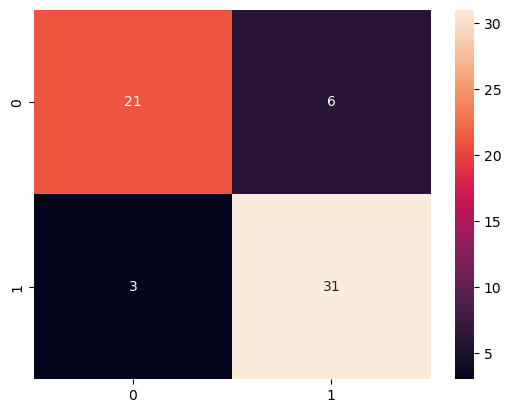

In [227]:
svm =SVC(kernel="poly",random_state=102)
svm.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = svm.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(svm,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

##  Decision Tree

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(2,20,2),
              'criterion' :['gini', 'entropy'],
              'random_state':[102,7,88,91]
             } 
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,cv=6,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_dt.fit(X_train, y_train)

In [ ]:
print("Best parameters set found on development set:")
print(grid_dt.best_params_)
print(grid_dt.best_score_)

The train accuracy score of DT is  0.8755186721991701
The test accuracy score of DT is  0.7704918032786885
[0.72131148 0.81967213 0.68333333 0.73333333 0.8       ]


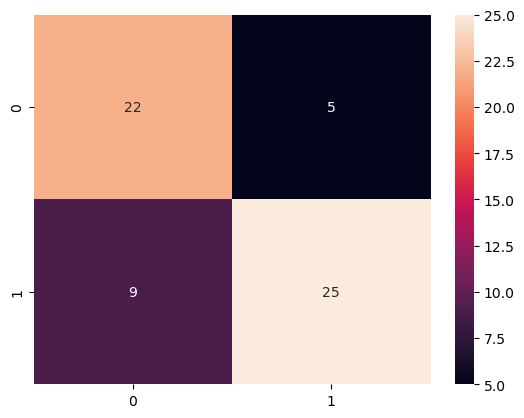

In [22]:

dt =DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=102)
dt.fit(X_train,y_train)


# predicting the values
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

## Boosing

In [ ]:
param_grid = {'learning_rate': [0.1,0.5,1.0,3.0,10.0],
              'n_estimators': [5, 10, 15,20,35,50,100],
              'random_state':[102,7,88,91]
             } 
grid_boosting = GridSearchCV( AdaBoostClassifier(), param_grid, refit = True, verbose = 3,cv=5,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_boosting.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(grid_boosting.best_params_)

In [ ]:
grid_boosting.best_score_

The train accuracy score of DT is  0.8713692946058091
The test accuracy score of DT is  0.7868852459016393
[0.85245902 0.85245902 0.83333333 0.76666667 0.76666667]


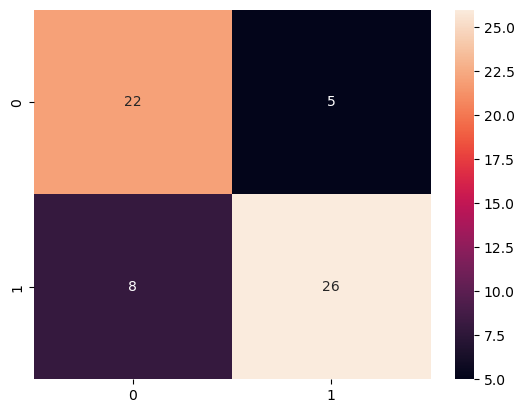

In [225]:
adabost = AdaBoostClassifier(n_estimators=20, random_state=102)

adabost.fit(X_train,y_train.squeeze(1))


# predicting the values
y_pred = adabost.predict(X_test)
y_pred_train = adabost.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

The train accuracy score of DT is  0.995850622406639
The test accuracy score of DT is  0.8032786885245902
[0.73770492 0.80327869 0.81666667 0.65       0.81666667]


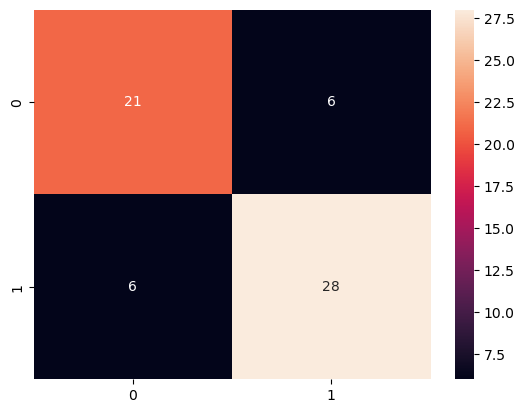

In [221]:
grad_boost = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, 
                                        max_depth=5, random_state=102).fit(X_train, y_train.squeeze(1))


# predicting the values
y_pred = grad_boost.predict(X_test)
y_pred_train = grad_boost.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(grad_boost,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result)

## KNN

In [ ]:
param_grid = {'n_neighbors': np.arange(1,20),
              'weights': ['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'leaf_size':[5,10,15,20,30,50,100]
             } 
grid_knn = GridSearchCV( KNeighborsClassifier(), param_grid, refit = True, verbose = 3,cv=6,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_knn.fit(X_train, y_train.squeeze(1))
print("Best parameters set found on development set:")
print(grid_knn.best_params_)

In [ ]:
grid_knn.best_score_

The train accuracy score of DT is  0.8630705394190872
The test accuracy score of DT is  0.7540983606557377
[0.83606557 0.8852459  0.8        0.81666667 0.75      ]


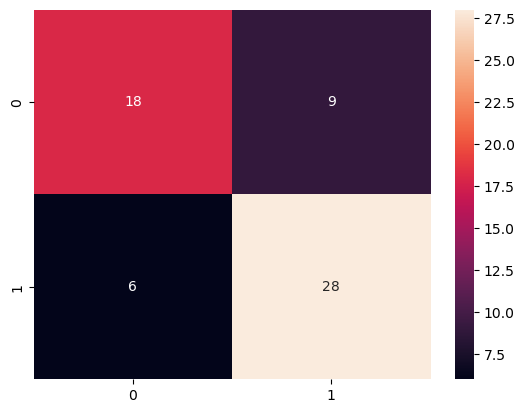

In [237]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(knn,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result)